In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import aipy
import scipy
import linsolve as ls

In [95]:
# %load cvcr.py
import numpy as np

def cvcr(f,g, op='timecv'):
    """Convolves or correlates to arrays.
    op is operation type.
    scv = Return array in original array units(convolution thm)
    scr = return correlation between the two arrays by conjugating the second
    hcv = similiar to scv but ignores inverse fourier transform and returns array in 'Hz'
    hcr = similiar to scr but ignores the inverse fourier transform"""
    
    assert (op in ('timecv','timecr','freqcv','freqcr'))
    #fourier transform functions
    f_fft = np.fft.rfft(f)
    g_fft = np.fft.rfft(g)
    fg = f_fft*g_fft
    fgc = f_fft*g_fft.conj()
    if op=='timecv':
        fcvg = np.fft.irfft(fg)
        return fcvg
    elif op=='timecr':
        fcrg = np.fft.irfft(fgc)
        return fcrg
    elif op=='freqcv':
        return fg
    elif op=='freqcr':
        return fgc



In [96]:
# %load delay.py
import numpy as np

def delay(a, dt, mode='wcon'):
    '''Returns a shifted or wrapped array based on mode 
    Example:

    Shifts and wraps (Shifts only integer type delays)
    >>>delay([1,2,3,4,5], 3)
    array([3,4,5,1,2])

    Shifts and adds guassian noise 
    >>>delay([1,2,3,4,5], 3, 'ncon')
    array([randint, randint, randint, 1, 2])

    'wfft' mode will shift and wrap an array via convolution theorem
    This mode can handle float type delays 
    '''
    assert (mode in ('wcon' , 'ncon', 'wfft')) #select mode from list
    assert (0 <= np.abs(dt) < a.size) #delay out of possible range
    
    if mode =='wcon':
        assert(type(dt) in (int, long))#To do float type delays use wfft
        d_a = np.concatenate((a[dt-a.size:],a[:dt]))
        return d_a
    elif mode=='ncon':
        assert(type(dt) in (int, long))#To do float type delays use wfft
        rand = np.random.rand(dt)
        d_a = np.concatenate((rand, a[:-rand.size]), axis=0)
        return d_a
    elif mode=='wfft': # TODO Improve Tolerance
        f_fft=np.fft.fft(a)
        #returns cycles per second if sample spacing of f is in seconds
        nu = np.fft.fftfreq(a.size)
        #Phase shift(kronecker delta)
        phi = np.exp(-2j * np.pi *nu * dt)
        fcvp = np.fft.ifft(phi * f_fft)
        d_a = fcvp.astype(a.dtype)
        return d_a
    
def mult(signals, elem, tau='n'):
    '''This function serves to create multiple arrays that 
    are delayed by some random amount.
    signals: Number of desired signal arrays
    elem: number of elements in signal array
    ld: lowest delay
    hd: highest delay
    '''
    assert tau in ('n' , 'rand', 'choose')
    n = np.random.randn(signals, elem)
    if tau == 'n':
        return n
    if tau == 'rand':
        ld = input('Enter minimum delay: ')
        hd = input('Enter max delay: ')
        for i in range(signals):
            r = np.random.randint(ld, hd)
            n[i]= delay(n[i], r, 'wfft')
        return n
    if tau =='choose':
        for i in range(signals):
            print 'Delay array ' , i+1 , ' by: '
            r = input()
            n[i]= delay(n[i], r, 'wfft')
        return n

def dmul(a, dt=0, mode='wcon'):
    assert (a.shape[1]>0) #dmul only works for array of arrays
    assert mode in ('wcon' , 'rand' , 'wfft')
    for i in range(a.shape[0]):
        if mode =='wfft':
            f_fft=np.fft.fft(a)
            nu = np.fft.fftfreq(a[i].size)
            phi = np.exp(-2j*np.pi*nu*dt)
            fcvp = np.fft.ifft(phi*f_fft)
            d_a = fcvp.real
    return d_a

In [99]:
help(mult)

Help on function mult in module __main__:

mult(signals, elem, tau='n')
    This function serves to create multiple arrays that 
    are delayed by some random amount.
    signals: Number of desired signal arrays
    elem: number of elements in signal array
    ld: lowest delay
    hd: highest delay



In [4]:
signal1 = np.random.randn(4000*1024)
signal2 = np.random.randn(4000*1024)

In [5]:
bl1 = np.array([30e2,0,0])
s1 = np.array([np.sqrt(2)/2, 0 , np.sqrt(2)/2])
clk_pr = 5 # ns
tj1 = np.dot(bl1, s1) / aipy.const.len_ns / clk_pr # Delay in samples

In [6]:
s2 = np.array([-np.sqrt(3)/2, 0, .5])
tj2 = np.dot(bl1, s2) / aipy.const.len_ns / clk_pr # Delay in samples 

In [7]:
anti_1 = delay(signal1, 0, 'wfft')
antj_1 = delay(signal1, tj1, 'wfft')
antk_1 = delay(signal1, 2*tj1, 'wfft')
antl_1 = delay(signal1, 3*tj1, 'wfft')

anti_2 = delay(signal2, 0,'wfft')
antj_2 = delay(signal2, tj2, 'wfft')
antk_2 = delay(signal2, 2*tj2, 'wfft')
antl_2 = delay(signal2, 3*tj2, 'wfft')

/home/champ2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:38: ComplexWarning: Casting complex values to real discards the imaginary part


In [8]:
# axij.plot(ij, c='b', label = 'aicraj')
# axij.plot(ij_, c='g')
# axij.plot(jk, c='r', label = 'ajcrak')
# axij.plot(jk_, c='y')axij.plot(ij, c='b', label = 'aicraj')
# axij.plot(ij_, c='g')
# axij.plot(jk, c='r', label = 'ajcrak')
# axij.plot(jk_, c='y')
s1st=np.random.randint(1,10)
s2st=np.random.randint(1,10)

gi=np.random.uniform(.5,1.5)
gj=np.random.uniform(.5,1.5)
gk=np.random.uniform(.5,1.5)
gl=np.random.uniform(.5,1.5)

In [84]:
# print gi
# print gj
# print gk
# print gl

print gi * gj

0.924706346488


In [10]:
gi_ = .93179
gj_ = 1.0732
gk_ = 1.09
gl_ = 1

# Add gain as a function of freq

anti_ = gi_*(s1st*anti_1+s2st*anti_2)
antj_ = gj_*(s1st*antj_1+s2st*antj_2)
antk_ = gk_*(s1st*antk_1+s2st*antk_2)
antl_ = gl_*(s1st*antl_1+s2st*antl_2)

anti = gi*(s1st*anti_1+s2st*anti_2)
antj = gj*(s1st*antj_1+s2st*antj_2)
antk = gk*(s1st*antk_1+s2st*antk_2)
antl = gl*(s1st*antl_1+s2st*antl_2)

In [11]:
for a in (anti, antj , antk, antl, anti_, antj_, antk_, antl_):
    a.shape = (-1,1024)

In [12]:
op='freqcr'
ijcor = cvcr(anti, antj, op)
jkcor = cvcr(antj, antk, op)
klcor = cvcr(antk, antl, op)
ikcor = cvcr(anti, antk, op)
jlcor = cvcr(antj, antl, op)
ilcor = cvcr(anti, antl, op)
ikcor = cvcr(anti, antk, op)


ijcor_ = cvcr(anti_, antj_, op)
jkcor_ = cvcr(antj_, antk_, op)
klcor_ = cvcr(antk_, antl_, op)
ikcor_ = cvcr(anti_, antk_, op)
jlcor_ = cvcr(antj_, antl_, op)
ilcor_ = cvcr(anti_, antl_, op)
ikcor_ = cvcr(anti_, antk_, op)

In [13]:
ijvis = np.average(ijcor, axis=0)
jkvis = np.average(jkcor, axis=0)
klvis = np.average(klcor, axis=0)
ikvis = np.average(ikcor, axis=0)
jlvis = np.average(jlcor, axis=0)
ilvis = np.average(ilcor, axis=0)
ikvis = np.average(ikcor, axis=0)

ijvis_ = np.average(ijcor_, axis=0)
jkvis_ = np.average(jkcor_, axis=0)
klvis_ = np.average(klcor_, axis=0)
ikvis_ = np.average(ikcor_, axis=0)
jlvis_ = np.average(jlcor_, axis=0)
ilvis_ = np.average(ilcor_, axis=0)
ikvis_ = np.average(ikcor_, axis=0)

In [14]:
test = {}
test[(1,2,'xx')] = np.arange(10)
test[(1,'x')] = 'stuff'
test['string'] = 1

In [15]:
print test['string']
print test.values()
print test.keys()
print test.items()
for key,val, in test.items():
    print key, '=====>', val

test2 = {}
for i in range(10):
    test2[str(2*i)] = i

print test2.items()

1
[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'stuff', 1]
[(1, 2, 'xx'), (1, 'x'), 'string']
[((1, 2, 'xx'), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])), ((1, 'x'), 'stuff'), ('string', 1)]
(1, 2, 'xx') =====> [0 1 2 3 4 5 6 7 8 9]
(1, 'x') =====> stuff
string =====> 1
[('10', 5), ('12', 6), ('14', 7), ('16', 8), ('18', 9), ('0', 0), ('2', 1), ('4', 2), ('6', 3), ('8', 4)]


In [16]:
for (n,letter) in enumerate(['a','b','c']):
    print n, letter

0 a
1 b
2 c


In [92]:
data = {}
data['etai + etaj + lnv1'] = np.abs(np.log(ijvis_))
data['etaj + etak + lnv1'] = np.abs(np.log(jkvis_))
data['etak + etal + lnv1'] = np.abs(np.log(klvis_))
data['etai + etak + lnv2'] = np.abs(np.log(ikvis_))
data['etaj + etal + lnv2'] = np.abs(np.log(jlvis_))
data['etai + etak + lnv3'] = np.abs(np.log(ikvis_))
data['etai + etaj + etak + etal'] = np.ones(513)

sys = ls.LinearSolver(data)
sol = sys.solve()

# names = ['id','data']
# formats = ['f8','f8']
# dtype = dict(names = names, formats=formats)
# array = np.array(sol.items(), dtype=dtype)

print sol['etal']


[ 1.15960462  1.154666    1.15658084  1.15927052  1.15807181  1.15556956
  1.15614088  1.15645446  1.15995321  1.15671231  1.15632975  1.15389501
  1.15662962  1.15597776  1.15510995  1.15376487  1.15912098  1.15557999
  1.15537854  1.15769828  1.15419783  1.15651545  1.15612513  1.15564987
  1.15597411  1.15686385  1.15781129  1.15714682  1.15434144  1.15665139
  1.15341783  1.15397528  1.16001341  1.15810832  1.15768922  1.16085465
  1.15627922  1.15260887  1.15509959  1.15365046  1.15534937  1.15708047
  1.15874008  1.15878735  1.1543742   1.1594595   1.15532767  1.15843467
  1.15208035  1.15617725  1.15532027  1.15338617  1.15409279  1.15381669
  1.15522743  1.1570657   1.15558017  1.15294715  1.15688153  1.15500873
  1.15738583  1.15272091  1.15508034  1.1542811   1.15469083  1.15497486
  1.15602058  1.15491473  1.1555673   1.15078949  1.15374377  1.15466502
  1.15373402  1.1524603   1.15543719  1.15650942  1.15698001  1.15364072
  1.15573936  1.15672236  1.15635748  1.15511191  1

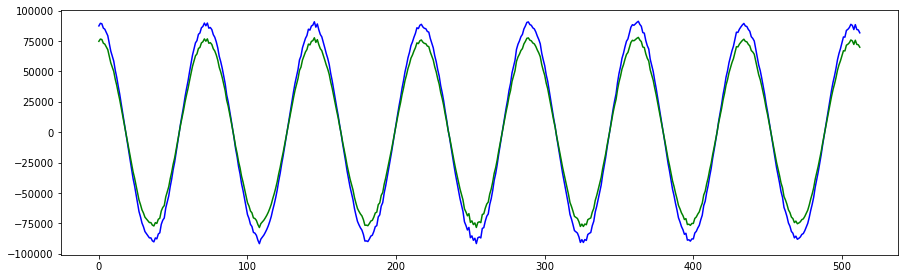

In [81]:
lw =1.5
fig, (axij) = plt.subplots(1, figsize=(15,4.5))
axij.plot(ijvis_ / (1.0361886213 *0.892411214988), c='b', label = 'aicraj')
axij.plot(ijvis, c='g')
# axij.plot(jkvis, c='r', label = 'ajcrak')
# axij.plot(jkvis_, c='y')
# axij.plot(klvis, c='m', label = 'akcral')
# axij.plot(klvis_, c='black')

# axij.set_xlim(50,100)

In [ ]:
axij.plot(ijvis, c='b', label = 'aicraj')
axij.plot(ijvis_, c='g')
axij.plot(jkvis, c='r', label = 'ajcrak')
axij.plot(jkvis_, c='y')
axij.plot(klvis, c='m', label = 'akcral')
axij.plot(klvis_, c='black')

axij.plot(ikvis, c='b', label = 'aicrak')
axij.plot(ikvis_, c='g')
axij.plot(jlvis, c='r', label = 'ajcral')
axij.plot(jlvis_, c='y')

axij.plot(ilvis, c='b', label = 'aicral')
axij.plot(ilvis_, c='g')

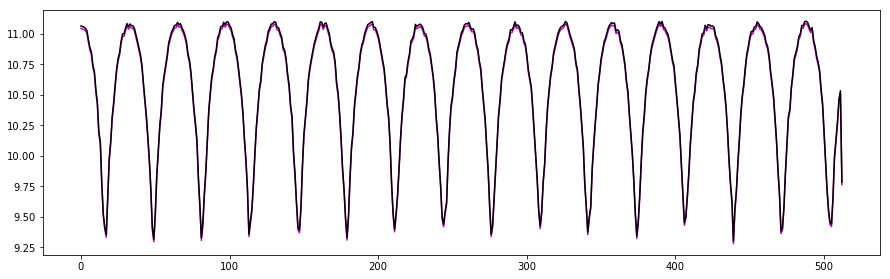

In [94]:
ijlog= np.log(ijvis)
jklog= np.log(jkvis)
kllog= np.log(klvis)
ijlog_= np.log(ijvis_)
jklog_= np.log(jkvis_)
kllog_= np.log(klvis_)+np.log(.97)

lw =1.5
fig, (axij) = plt.subplots(1, figsize=(15,4.5))
# axij.plot(ijlog, c='b', label = 'aicraj')
# axij.plot(ijlog_, c='g')
# axij.plot(jklog, c='r', label = 'ajcrak')
# axij.plot(jklog_, c='y')
axij.plot(kllog, c='m', label = 'akcral')
axij.plot(kllog_, c='black')


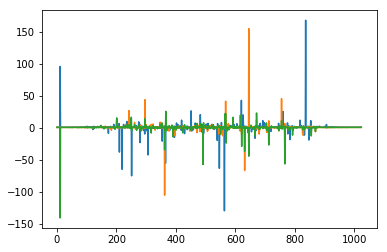

In [28]:
ij_jk = ij/jk
jk_kl = jk/kl
ij_kl = ij/kl

ij[2], jk[2],ij_jk[2]

plt.plot(ij_jk)
plt.plot(jk_kl)
plt.plot(ij_kl)

In [755]:
lvism = np.log(vism)

In [756]:
np.angle((np.sqrt(2) / 2 ) + (np.sqrt(2)/2)*1j)

0.78539816339744828